In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string, os
import tensorflow as tf

# keras module for building LSTM
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [2]:
df = pd.read_csv('output.csv')

In [3]:
# first few rows
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,ඉඟි බිඟි Ingi Bingi,rock,Nishantha,2013,210,"{""Killer B"",""Samitha Mudunkotuwa""}",[Intro: Killer B]\nYou know we do it big baby ...,238821,si,si,si
1,ජීවිතේ විඳින්න Jeewithe Windinna,rap,Daddy,2013,1878,{},[Verse 1:]\nවරෙන් යන්න අපිත් එක්ක කන්න බොන්න හ...,239252,si,si,si
2,මොට්ටු Mottu,rock,La Signore (Lahiru Perera),2013,8315,{},[Verse 1: La Signore]\nමාතලේ හැදුව මම ගේ තට්ටු...,239292,si,si,si
3,Tum Hi Ho Sinhala RnB Remake නුඹ නැති ලෝකේ,rock,Aki Vish Hegoda (VeronZ),2013,1146,{},[Intro]\nනුඹ නැති ලෝකේ පාලුයි මට දැන්\nආයෙත් එ...,239373,si,si,si
4,රත්තරන් මාගේ Raththran Mage,rock,Ashanthi,2013,140,"{""Damith Aasanka""}",[Hook: Asanka]\nරත්තරන් මාගේ සුරඟනක් වාගේ\nඇස්...,239375,si,si,si


In [4]:
# drop tag, year, views, features, artist
df.drop(['tag','year','views', 'features', 'artist', 'title'],axis=1,inplace=True)

In [5]:
# shape
df.shape

(307, 5)

In [6]:
df.head()

,lyrics,id,language_cld3,language_ft,language
0,[Intro: Killer B]\nYou know we do it big baby ...,238821,si,si,si
1,[Verse 1:]\nවරෙන් යන්න අපිත් එක්ක කන්න බොන්න හ...,239252,si,si,si
2,[Verse 1: La Signore]\nමාතලේ හැදුව මම ගේ තට්ටු...,239292,si,si,si
3,[Intro]\nනුඹ නැති ලෝකේ පාලුයි මට දැන්\nආයෙත් එ...,239373,si,si,si
4,[Hook: Asanka]\nරත්තරන් මාගේ සුරඟනක් වාගේ\nඇස්...,239375,si,si,si


In [7]:
# no of sinhala songs in the dataset
df['language'].value_counts().loc['si']

302

In [8]:
df['language_cld3'].value_counts().loc['si']

307

In [9]:
df['language_ft'].value_counts().loc['si']

302

In [10]:
# drop language_ft, language
df.drop(['language_ft', 'language'],axis=1,inplace=True)

In [11]:
df.head()

,lyrics,id,language_cld3
0,[Intro: Killer B]\nYou know we do it big baby ...,238821,si
1,[Verse 1:]\nවරෙන් යන්න අපිත් එක්ක කන්න බොන්න හ...,239252,si
2,[Verse 1: La Signore]\nමාතලේ හැදුව මම ගේ තට්ටු...,239292,si
3,[Intro]\nනුඹ නැති ලෝකේ පාලුයි මට දැන්\nආයෙත් එ...,239373,si
4,[Hook: Asanka]\nරත්තරන් මාගේ සුරඟනක් වාගේ\nඇස්...,239375,si


In [12]:
# shape
df.shape

(307, 3)

In [13]:
#selecting only first 100 sinhala songs
df = df.iloc[:30, :]

# Data Visualization

In [14]:
# checking the word count of the songs
df['word_count'] = df['lyrics'].apply(lambda x: len(str(x).split()))

In [15]:
df.head()

,lyrics,id,language_cld3,word_count
0,[Intro: Killer B]\nYou know we do it big baby ...,238821,si,369
1,[Verse 1:]\nවරෙන් යන්න අපිත් එක්ක කන්න බොන්න හ...,239252,si,299
2,[Verse 1: La Signore]\nමාතලේ හැදුව මම ගේ තට්ටු...,239292,si,143
3,[Intro]\nනුඹ නැති ලෝකේ පාලුයි මට දැන්\nආයෙත් එ...,239373,si,162
4,[Hook: Asanka]\nරත්තරන් මාගේ සුරඟනක් වාගේ\nඇස්...,239375,si,121


In [16]:
# statistical info
df['word_count'].describe()

count      30.000000
mean      350.966667
std       295.226329
min        59.000000
25%       168.250000
50%       284.500000
75%       400.250000
max      1613.000000
Name: word_count, dtype: float64

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

<Figure size 1200x600 with 0 Axes>

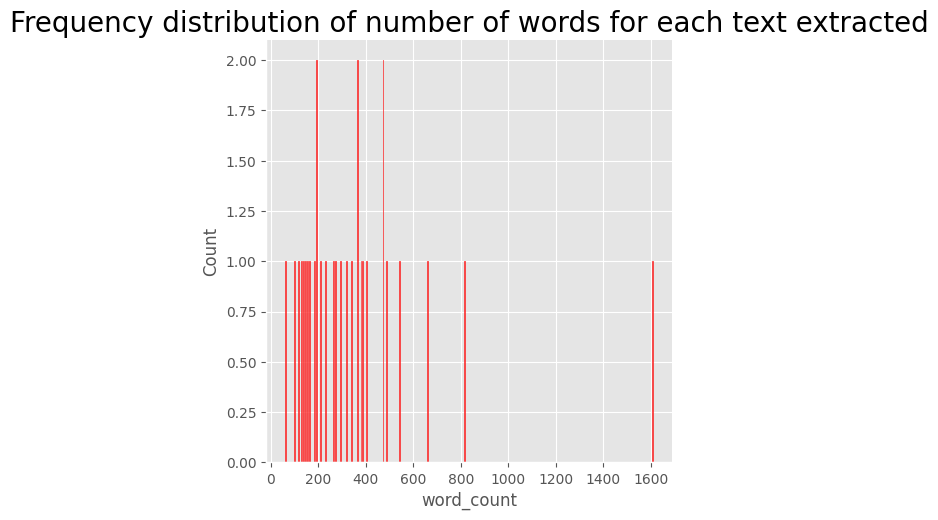

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.displot(df['word_count'],kde = False,color="red",bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

In [18]:
#drop all records with more than 600 word_count
df = df[df['word_count'] <= 600]

In [19]:
df.shape

(27, 4)

In [20]:
# Tokenization
tokenizer = Tokenizer()
# Fit the tokenizer on the lowercased lyrics column in the DataFrame
tokenizer.fit_on_texts(df['lyrics'].astype(str).str.lower())

# Calculate the total number of unique words in the lyrics dataset
total_words = len(tokenizer.word_index)+1
# Tokenize the lyrics using the fitted tokenizer
tokenized_sentences = tokenizer.texts_to_sequences(df['lyrics'].astype(str))
# Print the tokenized sentence for the first entry in the DataFrame
tokenized_sentences[0]

[293,
 227,
 228,
 35,
 170,
 171,
 403,
 80,
 172,
 137,
 294,
 294,
 102,
 171,
 404,
 1174,
 295,
 652,
 653,
 229,
 654,
 405,
 8,
 103,
 229,
 296,
 297,
 406,
 407,
 173,
 138,
 408,
 298,
 174,
 175,
 409,
 299,
 176,
 175,
 410,
 118,
 411,
 90,
 9,
 22,
 227,
 228,
 1175,
 81,
 300,
 35,
 137,
 1176,
 80,
 1177,
 1178,
 655,
 35,
 412,
 104,
 413,
 656,
 35,
 655,
 36,
 35,
 657,
 1179,
 1180,
 80,
 1181,
 1182,
 414,
 403,
 80,
 104,
 36,
 413,
 71,
 415,
 139,
 1183,
 1184,
 414,
 35,
 1185,
 50,
 81,
 170,
 35,
 1186,
 658,
 36,
 1187,
 1188,
 50,
 658,
 36,
 1189,
 230,
 659,
 36,
 1190,
 660,
 81,
 1191,
 661,
 119,
 177,
 416,
 662,
 81,
 170,
 1192,
 663,
 35,
 405,
 171,
 1193,
 1194,
 50,
 35,
 664,
 1195,
 177,
 1196,
 1197,
 661,
 1198,
 659,
 414,
 416,
 1199,
 103,
 665,
 666,
 1200,
 91,
 1201,
 1202,
 1203,
 1204,
 1205,
 51,
 417,
 1206,
 231,
 1207,
 667,
 668,
 669,
 418,
 232,
 10,
 173,
 8,
 103,
 229,
 296,
 297,
 406,
 407,
 173,
 138,
 408,
 298,
 174,
 

In [21]:
# Slash sequences into n-gram sequences
input_sequences = list()

# Iterate over each tokenized sentence
for i in tokenized_sentences:
    # Iterate over each token in the tokenized sentence
    for t in range(1, len(i)):
        # Create an n-gram sequence from the beginning to the current token
        n_gram_sequence = i[:t+1]
        # Append the n-gram sequence to the list of input sequences
        input_sequences.append(n_gram_sequence)

# prepadding
# Find the maximum sequence length among all input sequences
max_sequence_len = max([len(x) for x in input_sequences])

# Convert the list of input sequences into a numpy array with pre-padding
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [22]:
# Display the first 10 entries of the input_sequences array
input_sequences[:10]

array([[  0,   0,   0, ...,   0, 293, 227],
       [  0,   0,   0, ..., 293, 227, 228],
       [  0,   0,   0, ..., 227, 228,  35],
       ...,
       [  0,   0,   0, ..., 403,  80, 172],
       [  0,   0,   0, ...,  80, 172, 137],
       [  0,   0,   0, ..., 172, 137, 294]], dtype=int32)

In [23]:
# create predictors and label
X, labels = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# LSTM model development

In [25]:
model = Sequential()
model.add(Embedding(total_words, 40, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(250)))
model.add(Dropout(0.1))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
history = model.fit(X, y, epochs=10, verbose=1, callbacks=[earlystop])

Epoch 1/10
230/230 [==============================] - 652s 3s/step - loss: 7.7840 - accuracy: 0.0106
Epoch 2/10
230/230 [==============================] - 645s 3s/step - loss: 7.2890 - accuracy: 0.0190
Epoch 3/10
230/230 [==============================] - 641s 3s/step - loss: 6.8623 - accuracy: 0.0286
Epoch 4/10
230/230 [==============================] - 639s 3s/step - loss: 6.3270 - accuracy: 0.0441
Epoch 5/10
230/230 [==============================] - 641s 3s/step - loss: 5.7835 - accuracy: 0.0611
Epoch 6/10
230/230 [==============================] - 638s 3s/step - loss: 5.1462 - accuracy: 0.0912
Epoch 7/10
230/230 [==============================] - 639s 3s/step - loss: 4.4910 - accuracy: 0.1304
Epoch 8/10
230/230 [==============================] - 647s 3s/step - loss: 3.9196 - accuracy: 0.1871
Epoch 9/10
230/230 [==============================] - 639s 3s/step - loss: 3.3885 - accuracy: 0.2452
Epoch 10/10
230/230 [==============================] - 636s 3s/step - loss: 2.9028 - accura

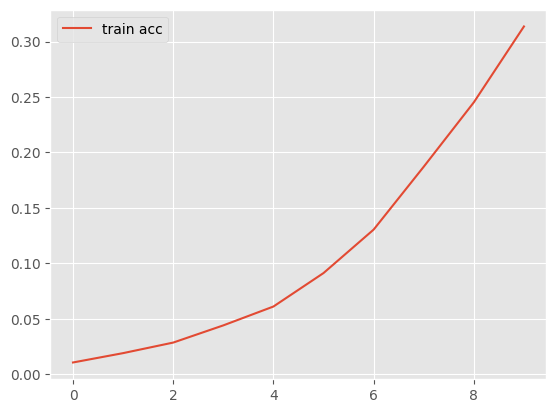

<Figure size 640x480 with 0 Axes>

In [26]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Generate new song lyrics

In [31]:
def complete_this_song(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_index = np.argmax(predicted_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [32]:
complete_this_song("අහස නිල් පාටයි", 40)

'අහස නිල් පාටයි ඉන්න තනලා තනලා ඉරේ නිව නිව දමා අරන් අරන් සිහිල් සිහිල් සිහිල් වෙලා වෙලා වෙලා මගේ ලොකේ තනලා ඉරේ රැස් දමා ඔයා අරන් අරන් සිහිල් සිහිල් සිහිල් වෙලා මගේ කැලුම් කැලුම් විනාශේම සන්ද සන්ද දැක්ක සන්ද යලිත් මගෙ අම්මේ මම'

In [33]:
complete_this_song("ඔබට මම", 40)

'ඔබට මම තනලා තනලා ඉරේ නිව නිව දමා අරන් අරන් සිහිල් සිහිල් සිහිල් වෙලා වෙලා වෙලා මගේ මේක ඔයා ඔයා ඔයා ඔයා ඔයා ඔයා ඒ ඒ කාලේ ඒ කාලයේ ඒ කාලයේ ඒ කාලයේ ඒ කාලයේ ඒ කාලයේ ඒ කාලයේ ඒ කාලයේ ඒ'